#### Student Name: Cian O Brien
#### Student Number: R00101689


## Titanic Model

##### The purpose of this assignment is to expolore the titanic data set and predict wheather a passengers survival rate based on certain featues. Several techniques have been implemented to determine this and increase the accuracy of the model, Mapping of Categorical Data OneHotEncoding, SMOTE and feature engineering.

######  Read in the data

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import sklearn
import scipy as sp
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [86]:

print(sklearn.__version__)

0.21.3


In [279]:
## Default Data Folder ##
folder = 'C:\\Users\\obria\\Desktop\\Year2\\ML\\Assignment2\\'

In [280]:
# Import Data
train_df  = pd.read_csv('{0}train.csv'.format(folder))
test_df  = pd.read_csv('{0}test.csv'.format(folder))

In [216]:
#View Dataframe
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Remove the following features; Name,  Cabin & Ticket  

In [281]:
# Drop unwanted columns
train_df = train_df.drop(["Name", "Cabin", "Ticket"], axis=1)
test_df  = test_df.drop(["Name", "Cabin", "Ticket"], axis=1)

In [141]:
#Check if columns dropped
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [142]:
#Print the shape (Get the number of rows and cols)
test_df.shape

(418, 8)

#### [Missing  Values] You will notice that in the Titanic dataset there are a number of missing values for some features. 
#### Determine the number of missing value in each column. 

In [143]:
# Show the number of missing (NAN, NaN, na) data for each column
# of the training dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [144]:
# Show the number of missing (NAN, NaN, na) data for each column
# of the test dataset
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

### Cleaning the Data.

In [282]:
# You will notice the Age column has the highest number of missing values in both the train and test dataset. 
# Use Scikit’s SimpleImputer class to impute the missing value using a strategy.
# Note that SimpleImputer wasn't working on my machine due to the fact that I have an older version of Jupyter installed, 
# as a result I used Imputer instead

imputer = Imputer(missing_values= np.NaN, strategy='mean')
imputer.fit( train_df[['Age']] )
imputer.fit( train_df[['Fare']] )
imputer.fit( test_df[['Age']] )
imputer.fit( test_df[['Fare']] )
train_df['Age'] = imputer.transform(train_df[['Age']])
test_df['Age'] = imputer.transform(test_df[['Age']])
train_df['Fare'] = imputer.transform(train_df[['Fare']])
test_df['Fare'] = imputer.transform(test_df[['Fare']])

C:\Users\obria\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [283]:
# The Imputer wouldn't work on categorical data so I used the below function to populate missing data in the Embarked column 
# with the most frequent values.

train_df.Embarked.fillna(train_df.Embarked.mode()[0], inplace = True)

#### Encoding Categorical Variables 

In [284]:
# Use the map function in Pandas to map the values for Sex (female and male) to
# numerical values 0 and 1

sex_mappingTrain= {'female':0, 'male':1}
train_df['Sex'] = train_df['Sex'].map(sex_mappingTrain)

sex_mappingTest= {'female':0, 'male':1}
test_df['Sex'] = test_df['Sex'].map(sex_mappingTest)

In [285]:
#Use the map function to map the values for the Embarked feature to numeric values
#( {'S': 0, 'C': 1, 'Q': 2} ).

embarked_mappingTrain= {'S': 0, 'C': 1, 'Q': 2}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mappingTrain)

embarked_mappingTest= {'S': 0, 'C': 1, 'Q': 2}
test_df['Embarked'] = test_df['Embarked'].map(embarked_mappingTest)

In [286]:
# Store PassengerID before it's removed
df_PassengerID = test_df["PassengerId"]



#### Implement OneHotEncoding - This should increase the accuracy of the model

In [287]:
encoder = OneHotEncoder(sparse=False)
Embarked_Encoded_train = encoder.fit_transform( train_df[["Embarked"]] )
Embarked_Encoded_test = encoder.fit_transform( test_df[["Embarked"]] )


C:\Users\obria\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\obria\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

In [288]:
Embarked_Encoded_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### With the pre-processing complete we now want to separate the training and test data. The training data contains -1 values only in the survived column. Use this information to separate the train and test data.

In [289]:
# We can see from the below that there is no -1 valuie in the survived column
train_df['Survived'].value_counts(dropna=False)

0    549
1    342
Name: Survived, dtype: int64

In [290]:
# Create new DF for survive data while we make changes to the other data
survived_df = train_df[['Survived']].copy()

survived_df.rename(columns={'Survived': 'SurvivedNew'}, inplace=True)

In [227]:
survived_df.head()

,SurvivedNew
0,0
1,1
2,1
3,1
4,0


In [155]:
# Check for any negative numbers # 
print(train_df.where(train_df < 0).count())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


#### Implement One hot encoding instead of dummy variables to transform categorical data

In [228]:
#copy_train=train_df.copy()
#copy_test=test_df.copy()

In [291]:
train_Embarked = train_df["Embarked"].values.reshape(-1,1)
onehot_encoder = OneHotEncoder(sparse=False)
train_OneHotEncoded = onehot_encoder.fit_transform(train_Embarked)
train_df["EmbarkedS"] = train_OneHotEncoded[:,0]
train_df["EmbarkedC"] = train_OneHotEncoded[:,1]
train_df["EmbarkedQ"] = train_OneHotEncoded[:,2]

C:\Users\obria\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [292]:
test_Embarked = test_df["Embarked"].values.reshape(-1,1)
onehot_encoder = OneHotEncoder(sparse=False)
test_OneHotEncoded = onehot_encoder.fit_transform(test_Embarked)
test_df["EmbarkedS"] = test_OneHotEncoded[:,0]
test_df["EmbarkedC"] = test_OneHotEncoded[:,1]
test_df["EmbarkedQ"] = test_OneHotEncoded[:,2]

C:\Users\obria\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [159]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,EmbarkedS,EmbarkedC,EmbarkedQ
0,1,0,3,1,22.0,1,0,7.2500,0,1.0,0.0,0.0
1,2,1,1,0,38.0,1,0,71.2833,1,0.0,1.0,0.0
2,3,1,3,0,26.0,0,0,7.9250,0,1.0,0.0,0.0
3,4,1,1,0,35.0,1,0,53.1000,0,1.0,0.0,0.0
4,5,0,3,1,35.0,0,0,8.0500,0,1.0,0.0,0.0


# Visual Representations of the data before we standardise

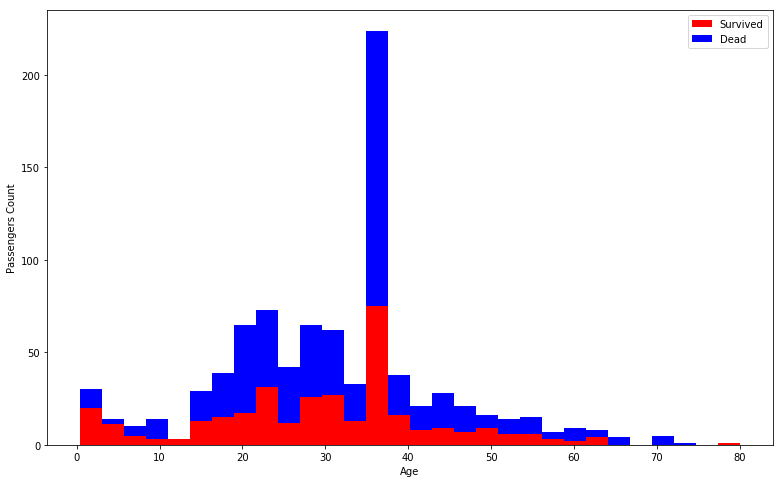

In [293]:
figure = plt.figure(figsize=(13,8))
plt.hist([train_df[train_df['Survived']==1]['Age'].dropna(),train_df[train_df['Survived']==0]['Age'].dropna()], stacked=True, color = ['r','b'], bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Passengers Count')
plt.legend()

### The above visualisation is a particularly nice one, it details the age and survival rate of passengers, it is fair to say from looking at this that the younger the passeg=nger the greater the rate of survival.

### Another interesting point to takeaway is we can see that the most deaths were people between the ages of 35-40

               0    1
Survived     233  109
Casucalties   81  468


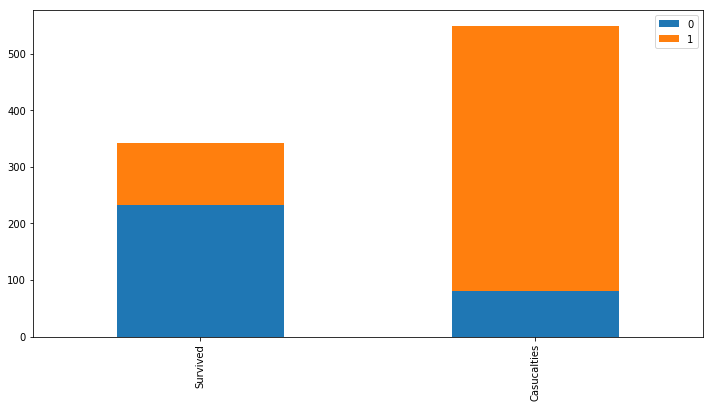

In [294]:
survivors = train_df[train_df['Survived']==1]['Sex'].value_counts()
casualties = train_df[train_df['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survivors,casualties])
df.index = ['Survived','Casucalties']
print (df)

df.plot(kind='bar',stacked=True, figsize=(12,6))

### 0 = Females
### 1= Males
#### The above graph shows the survival and death rate between males and females, we can see that far less males survived

C:\Users\obria\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\obria\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


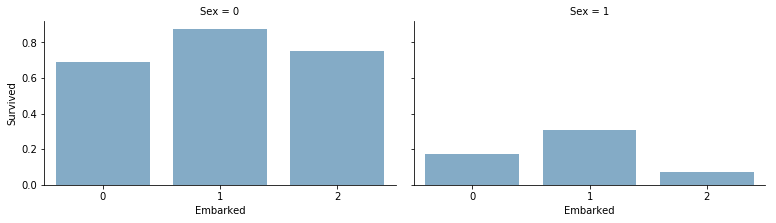

In [296]:
import seaborn as sns

grid = sns.FacetGrid(train_df, col ='Sex', size = 3.2, aspect =1.7)
grid.map(sns.barplot, 'Embarked','Survived', alpha= 0.6, ci = None)


#### This graph details the survival rate grouped by sex throughout all Embarked locations.
#### The first facet is based on females, the highest survival rate was for those who Embarked from EmbarkedS
#### The second facet is based on males, the highest survival rate was also for those who Embarked from EmbarkedS, the lowest survival rate was for those who embarked from EmbarkedQ, maybe this is a poorer area?

## Now that we have tranformed our categorical variables it is now time to standardise them and continue with our data transformation and model creation

#### Stanardize all columns

In [297]:
ss = StandardScaler()
train_df = pd.DataFrame(ss.fit_transform(train_df),columns = train_df.columns)
test_df = pd.DataFrame(ss.fit_transform(test_df),columns = test_df.columns)

In [298]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,EmbarkedS,EmbarkedC,EmbarkedQ
0,-1.730108,-0.789272,0.827377,0.737695,-0.672063,0.432793,-0.473674,-0.502445,-0.568837,0.615838,-0.482043,-0.307562
1,-1.726220,1.266990,-1.566107,-1.355574,0.539305,0.432793,-0.473674,0.786845,1.005181,-1.623803,2.074505,-0.307562
2,-1.722332,1.266990,0.827377,-1.355574,-0.369221,-0.474545,-0.473674,-0.488854,-0.568837,0.615838,-0.482043,-0.307562
3,-1.718444,1.266990,-1.566107,-1.355574,0.312173,0.432793,-0.473674,0.420730,-0.568837,0.615838,-0.482043,-0.307562
4,-1.714556,-0.789272,0.827377,0.737695,0.312173,-0.474545,-0.473674,-0.486337,-0.568837,0.615838,-0.482043,-0.307562


#### Remove Passenger ID from the test and training set, store the Passenger ID from the test set in a different DF called df_PassengerID

In [299]:
# Drop unwanted columns
train_df = train_df.drop(["PassengerId"], axis=1)
test_df = test_df.drop(["Embarked"], axis=1)
test_df = test_df.drop(["PassengerId"], axis=1)


In [300]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,EmbarkedS,EmbarkedC,EmbarkedQ
0,-0.789272,0.827377,0.737695,-0.672063,0.432793,-0.473674,-0.502445,-0.568837,0.615838,-0.482043,-0.307562
1,1.266990,-1.566107,-1.355574,0.539305,0.432793,-0.473674,0.786845,1.005181,-1.623803,2.074505,-0.307562
2,1.266990,0.827377,-1.355574,-0.369221,-0.474545,-0.473674,-0.488854,-0.568837,0.615838,-0.482043,-0.307562
3,1.266990,-1.566107,-1.355574,0.312173,0.432793,-0.473674,0.420730,-0.568837,0.615838,-0.482043,-0.307562
4,-0.789272,0.827377,0.737695,0.312173,-0.474545,-0.473674,-0.486337,-0.568837,0.615838,-0.482043,-0.307562


In [301]:
df_PassengerID.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [168]:
train_df.shape

(891, 11)

In [169]:
test_df.shape

(418, 9)

In [302]:
#Put survived data back in
train_df = pd.concat([train_df, survived_df], axis=1)

In [171]:
train_df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,EmbarkedS,EmbarkedC,EmbarkedQ,SurvivedNew
0,-0.789272,0.827377,0.737695,-0.672063,0.432793,-0.473674,-0.502445,-0.568837,0.615838,-0.482043,-0.307562,0


In [303]:
# Drop the first survived column
train_df = train_df.drop(["Survived"], axis=1)

In [304]:
train_df.rename(columns={'SurvivedNew': 'Survived'}, inplace=True)

In [238]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,EmbarkedS,EmbarkedC,EmbarkedQ,Survived
0,0.827377,0.737695,-0.672063,0.432793,-0.473674,-0.502445,-0.568837,0.615838,-0.482043,-0.307562,0
1,-1.566107,-1.355574,0.539305,0.432793,-0.473674,0.786845,1.005181,-1.623803,2.074505,-0.307562,1
2,0.827377,-1.355574,-0.369221,-0.474545,-0.473674,-0.488854,-0.568837,0.615838,-0.482043,-0.307562,1
3,-1.566107,-1.355574,0.312173,0.432793,-0.473674,0.420730,-0.568837,0.615838,-0.482043,-0.307562,1
4,0.827377,0.737695,0.312173,-0.474545,-0.473674,-0.486337,-0.568837,0.615838,-0.482043,-0.307562,0


In [305]:
# Drop Embarked column, this is nolonger needed

train_df = train_df.drop(["Embarked"], axis=1)

In [306]:
copytrain_df = train_df
copyTest_df = test_df

#### Model Creation

In [307]:
X = np.array(train_df.ix[:, train_df.columns != 'Survived'])
y = np.array(train_df.ix[:, train_df.columns == 'Survived'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# split into train & test sets
features = ['Pclass','Sex','Age', 'SibSp', 'Parch', 'Fare', 'EmbarkedS','EmbarkedC','EmbarkedQ']

# split train and test data
X = train_df[features]

y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019)

C:\Users\obria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\obria\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Shape of X: (891, 9)
Shape of y: (891, 1)


#### Random Forrest Model

In [308]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time

rfc_param_dist = {'n_estimators': [20,50,10,200],
                  'max_depth': [2,4,8,None],
                  'max_features': [4],
                  'bootstrap': [True, False],
                  'criterion': ["gini", "entropy"]}


# random forest model
rfc = RandomForestClassifier()


# grid search
rf_search_grid = GridSearchCV(estimator=rfc, param_grid=rfc_param_dist, cv=5, verbose=2, n_jobs=-1)

# start timer
start = time.time()

# fit the grid search model
rf_search_grid.fit(X, y)

end = time.time()
print('GridSearchCV took {0:.2f} seconds'.format((end - start)))


rf_search_grid.best_params_


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.0min finished


GridSearchCV took 63.58 seconds


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 4,
 'n_estimators': 50}

In [309]:
rf_search_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [310]:
rf_search_grid.best_score_
rf = rf_search_grid.best_score_
rf

0.8327721661054994

#### KNN Model 

In [245]:
# try 3 different Ks to pick the best one to train the model
neigh5 = KNeighborsClassifier(n_neighbors=5).fit(X, y)
yhat5 = neigh5.predict(X_test)
cm5 = metrics.confusion_matrix(y_test, yhat5)
print('Test set Accuracy of K=5:', metrics.accuracy_score(y_test, yhat5))
print(cm5)

neigh17 = KNeighborsClassifier(n_neighbors=17).fit(X, y)
yhat17 = neigh17.predict(X_test)
cm17 = metrics.confusion_matrix(y_test, yhat17)
print('Test set Accuracy of K=17: ', metrics.accuracy_score(y_test, yhat17))
print(cm17)


neigh29 = KNeighborsClassifier(n_neighbors=29).fit(X, y)
yhat29 = neigh29.predict(X_test)
cm29 = metrics.confusion_matrix(y_test, yhat29)
print('Test set Accuracy of K=29 : ', metrics.accuracy_score(y_test, yhat29))
print(cm29)

Test set Accuracy of K=5: 0.8565022421524664
[[131  15]
 [ 17  60]]
Test set Accuracy of K=17:  0.852017937219731
[[132  14]
 [ 19  58]]
Test set Accuracy of K=29 :  0.8430493273542601
[[135  11]
 [ 24  53]]


#### Decision Tree

In [246]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, 
                           n_informative=3,n_redundant=2, 
                           n_repeated=0, n_classes=8,n_clusters_per_class=1, 
                           random_state=0)
decTree= DecisionTreeClassifier()
decTree_scores = model_selection.cross_val_score(decTree, X, y, cv=10)
print ('Initial Result',decTree_scores.mean())

Initial Result 0.7178585501283966


## Accuracy of models before balancing data set and feature engineering

In [314]:
print("The model accuracies")
print("Random Forest",rf)
print("KNN (K=29)",metrics.accuracy_score(y_test, yhat29))
print("Decision Tree",decTree_scores.mean())

The model accuracies
Random Forest 0.8327721661054994
KNN (K=29) 0.8430493273542601
Decision Tree 0.7178585501283966


# Balancing the classes & testing the models again

In [247]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2019)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


Before OverSampling, counts of label '1': 265
Before OverSampling, counts of label '0': 403 

After OverSampling, the shape of train_X: (806, 9)
After OverSampling, the shape of train_y: (806,) 

After OverSampling, counts of label '1': 403
After OverSampling, counts of label '0': 403


In [248]:
X = X_train_res
y = y_train_res
X, y = sm.fit_sample(X=X, y=y)


In [194]:
X.shape

(806, 9)

In [195]:
y.shape

(806,)

#### Random Forrest - lets try a simple random forest model first

In [249]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)
y_pred = model.predict(test_df)
print ("Train Accuracy" ,accuracy_score(y,model.predict(X)))


Train Accuracy 0.9851116625310173


In [250]:
resultSeries = pd.Series(data = y_pred, name = 'Survived', dtype='int64') 

# create a data frame with just the PassengerID feature from the test dataset and the results  
df = pd.DataFrame({"PassengerId":df_PassengerID, "Survived":resultSeries}) 
 
# write the results to a CSV file (you should then upload this file) 
df.to_csv("submission.csv", index=False, header=True) 

#### The above submission only yielded a 71% accuracy rate when submitted to Kaggle.

In [251]:
balanced_rfc_param_dist = {'n_estimators': [20,50,10,200],
                  'max_depth': [2,4,8,None],
                  'max_features': [4],
                  'bootstrap': [True, False],
                  'criterion': ["gini", "entropy"]}


# random forest model
balanced_rfc = RandomForestClassifier()


# grid search
balanced_rf_search_grid = GridSearchCV(estimator=rfc, param_grid=balanced_rfc_param_dist, cv=5, verbose=2, n_jobs=-1)

# start timer
start = time.time()

# fit the grid search model
balanced_rf_search_grid.fit(X, y)

end = time.time()
print('GridSearchCV took {0:.2f} seconds'.format((end - start)))


balanced_rf_search_grid.best_params_


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   32.9s


GridSearchCV took 46.18 seconds


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   45.1s finished


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 4,
 'n_estimators': 20}

In [252]:
balanced_rf_search_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 4,
 'n_estimators': 20}

In [253]:
rf_model= balanced_rf_search_grid.best_score_
print(rf_model)

0.8188585607940446


#### Hyper tune the random forest model

In [254]:
#{'bootstrap': True,
#'criterion': 'gini',
#'max_depth': 4,
#'max_features': 4,
#'n_estimators': 200}

balanced_rfc_param_dist1 = {'n_estimators': [200],
                  'max_depth': [4],
                  'max_features': [4],
                  'bootstrap': [True],
                  'criterion': ["gini"]}

# random forest model
balanced_rfc1 = RandomForestClassifier()

# grid search
balanced_rf_search_grid1 = GridSearchCV(estimator=rfc, param_grid=balanced_rfc_param_dist1, cv=5, verbose=2, n_jobs=-1)

# fit the grid search model
balanced_rf_search_grid1.fit(X, y)

rf_model1= balanced_rf_search_grid1.best_score_
print(rf_model1)

y_pred2 = balanced_rf_search_grid1.predict(test_df)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished


0.8089330024813896


In [255]:
resultSeries2 = pd.Series(data = y_pred2, name = 'Survived', dtype='int64') 

# create a data frame with just the PassengerID feature from the test dataset and the results  
df = pd.DataFrame({"PassengerId":df_PassengerID, "Survived":resultSeries}) 
 
# write the results to a CSV file (you should then upload this file) 
df.to_csv("submission2.csv", index=False, header=True) 

#### The above hyper tuned model submission only yielded a 73% accuracy rate when submitted to Kaggle.

## Find best features, remove features that less important

In [256]:
copytrain_df.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,EmbarkedS,EmbarkedC,EmbarkedQ,Survived
0,0.827377,0.737695,-0.672063,0.432793,-0.473674,-0.502445,0.615838,-0.482043,-0.307562,0


In [258]:
copytrain_df = train_df
copyTest_df = test_df

X_train = copytrain_df.drop(['Survived'], axis=1)
y_train = copytrain_df['Survived']  # Relocate Survived target feature to y_train

In [261]:
rforest_checker = RandomForestClassifier(random_state = 0)
rforest_checker.fit(X_train, y_train)
importances_df = pd.DataFrame(rforest_checker.feature_importances_, columns=['Feature_Importance'],
                              index=X_train.columns)
importances_df.sort_values(by=['Feature_Importance'], ascending=False, inplace=True)
print(importances_df)

           Feature_Importance
Sex                  0.273078
Fare                 0.258688
Age                  0.257935
Pclass               0.075735
SibSp                0.046375
Parch                0.043997
EmbarkedS            0.021755
EmbarkedC            0.016712
EmbarkedQ            0.005726


C:\Users\obria\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### We can see from the above tabe the importance of each feature, I am going to remove the following features from my dataset and I will run my Rndom forrest model again:
#### Parch 
#### EmbarkedS
#### EmbarkedC
#### EmbarkedQ

In [269]:
## Remove above features
X_train = X_train.drop(['Parch','EmbarkedS','EmbarkedC', 'EmbarkedQ'], axis=1)
X_test = X_test.drop(['Parch','EmbarkedS','EmbarkedC', 'EmbarkedQ'], axis=1)

In [270]:
X_train.head(1)

,Pclass,Sex,Age,SibSp,Fare
0,0.827377,0.737695,-0.672063,0.432793,-0.502445


In [271]:
X_test.head(1)

,Pclass,Sex,Age,SibSp,Fare
567,0.827377,-1.355574,-0.142089,-0.474545,-0.224083


In [273]:
## Run Random Forest one last time
#{'bootstrap': True,
#'criterion': 'gini',
#'max_depth': 4,
#'max_features': 4,
#'n_estimators': 200}

balanced_rfc_param_dist2 = {'n_estimators': [200],
                  'max_depth': [4],
                  'max_features': [4],
                  'bootstrap': [True],
                  'criterion': ["gini"]}

# random forest model
balanced_rfc2 = RandomForestClassifier()

# grid search
balanced_rf_search_grid2 = GridSearchCV(estimator=rfc, param_grid=balanced_rfc_param_dist2, cv=5, verbose=2, n_jobs=-1)

# fit the grid search model
balanced_rf_search_grid2.fit(X, y)

rf_model1= balanced_rf_search_grid2.best_score_
print(rf_model1)

y_pred3 = balanced_rf_search_grid2.predict(test_df)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.0s finished


0.8089330024813896


In [274]:
resultSeries3 = pd.Series(data = y_pred3, name = 'Survived', dtype='int64') 

# create a data frame with just the PassengerID feature from the test dataset and the results  
df3 = pd.DataFrame({"PassengerId":df_PassengerID, "Survived":resultSeries}) 
 
# write the results to a CSV file (you should then upload this file) 
df3.to_csv("submission3.csv", index=False, header=True) 

#### After removing those 4 features and re submitting my model I got the following message from Kaggle:
#### You advanced 388 places on the leaderboard!Your submission scored 0.74641, which is an improvement of your previous score of 0.73205. Great job!

### KNN after balancing the dataset

In [316]:
# try 3 different Ks to pick the best one to train the model
balanced_neigh5 = KNeighborsClassifier(n_neighbors=5).fit(X, y)
balanced_yhat5 = balanced_neigh5.predict(X_test)
balanced_cm5 = metrics.confusion_matrix(y_test, balanced_yhat5)
print('Test set Accuracy of K=5:', metrics.accuracy_score(y_test, balanced_yhat5))
print(balanced_cm5)

balanced_neigh17 = KNeighborsClassifier(n_neighbors=17).fit(X, y)
balanced_yhat17 = balanced_neigh17.predict(X_test)
balanced_cm17 = metrics.confusion_matrix(y_test, balanced_yhat17)
print('Test set Accuracy of K=17: ', metrics.accuracy_score(y_test, balanced_yhat17))
print(balanced_cm17)


balanced_neigh29 = KNeighborsClassifier(n_neighbors=29).fit(X, y)
balanced_yhat29 = balanced_neigh29.predict(X_test)
balanced_cm29 = metrics.confusion_matrix(y_test, balanced_yhat29)
print('Test set Accuracy of K=29 : ', metrics.accuracy_score(y_test, balanced_yhat29))
print(balanced_cm29)

Test set Accuracy of K=5: 0.8565022421524664
[[131  15]
 [ 17  60]]
Test set Accuracy of K=17:  0.852017937219731
[[132  14]
 [ 19  58]]
Test set Accuracy of K=29 :  0.8430493273542601
[[135  11]
 [ 24  53]]


### Decision Tree after balancing the dataset

In [317]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, 
                           n_informative=3,n_redundant=2, 
                           n_repeated=0, n_classes=8,n_clusters_per_class=1, 
                           random_state=0)
decTree= DecisionTreeClassifier()
decTree_scores = model_selection.cross_val_score(decTree, X, y, cv=10)
print ('Initial Result',decTree_scores.mean())

Initial Result 0.7225862826517702


In [319]:
print("The model accuracies after balancing the data set and removing features")
print("Random Forest",rf_model1)
print("KNN (K=29)",metrics.accuracy_score(y_test, balanced_yhat29))
print("Decision Tree",decTree_scores.mean())

The model accuracies after balancing the data set and removing features
Random Forest 0.8089330024813896
KNN (K=29) 0.8430493273542601
Decision Tree 0.7225862826517702


### We can see that the accuracies haven't varied that much, theb random forest model decreased by 3% after removing features and balancing the dataset, however that said the new model was got a beter accuracy score when submitted to Kaggle.

### KNN - Never changed when we compared both k=29 models.

### Decision Tree - The new model increased from 71% - 72%




##### Please see old accuracies below (Pre - Balancing and Feature removal).
###### Random Forest 0.8327721661054994
###### KNN (K=29) 0.8430493273542601
###### Decision Tree 0.7178585501283966

### Below I created a graph to check for the optimum value of K for KNN, Looking at the below graph I have determained that the optimum value is around 12

In [209]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7488789237668162, 0.8071748878923767, 0.7892376681614349, 0.8071748878923767, 0.8071748878923767, 0.8116591928251121, 0.8071748878923767, 0.8116591928251121, 0.8161434977578476, 0.8161434977578476, 0.820627802690583, 0.8385650224215246, 0.8295964125560538, 0.8295964125560538, 0.8251121076233184, 0.8295964125560538, 0.8161434977578476, 0.8340807174887892, 0.8161434977578476, 0.820627802690583, 0.820627802690583, 0.8251121076233184, 0.820627802690583, 0.820627802690583, 0.820627802690583]


Text(0,0.5,'Testing Accuracy')

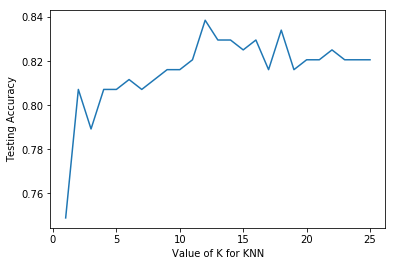

In [210]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### Similar to above I wanted to explore the differences in testing and training accuracies in a decision tree model. As suspected we can see that the accuracy of the training model increases in a linear fashion, However the test set drops when the tree is greater than 4 depths, this might be as a result of overfitting.

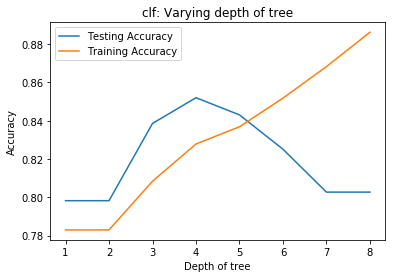

In [211]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

## Conclusion:

#### After performing Analysis on the Titanic Dataset we can conclude that the survival rate of a passenger can be predicted with a reasonable degree of accuracy (73%), The features used to attain this level of accuracy were PClass, Sex, Age, SibSp & Fare.
    